In [1]:
from carculator_bus import *
import matplotlib.pyplot as plt

In [2]:
bip = BusInputParameters()
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"year":[2020,],"size":["13m-city"], "powertrain":["BEV-depot", "BEV-opp", "ICEV-g", "HEV-d", "ICEV-d"]}
)
bm = BusModel(array,)
bm.set_all()

Finding solutions for buses...
motiv_energy_at_wheels (17918, 1, 1, 5, 1)
engine_efficiency (17918, 1, 1, 5, 1)
transmission_efficiency (17918, 1, 1, 5, 1)
fuel_cell_system_efficiency (1, 1, 5, 1)

motive_energy (17918, 1, 1, 5, 1)

motiv_energy_at_wheels (17918, 1, 1, 5, 1)
engine_efficiency (17918, 1, 1, 5, 1)
transmission_efficiency (17918, 1, 1, 5, 1)
fuel_cell_system_efficiency (1, 1, 5, 1)

motive_energy (17918, 1, 1, 5, 1)

motiv_energy_at_wheels (17918, 1, 1, 5, 1)
engine_efficiency (17918, 1, 1, 5, 1)
transmission_efficiency (17918, 1, 1, 5, 1)
fuel_cell_system_efficiency (1, 1, 5, 1)

motive_energy (17918, 1, 1, 5, 1)

motiv_energy_at_wheels (17918, 1, 1, 5, 1)
engine_efficiency (17918, 1, 1, 5, 1)
transmission_efficiency (17918, 1, 1, 5, 1)
fuel_cell_system_efficiency (1, 1, 5, 1)

motive_energy (17918, 1, 1, 5, 1)

motiv_energy_at_wheels (17918, 1, 1, 5, 1)
engine_efficiency (17918, 1, 1, 5, 1)
transmission_efficiency (17918, 1, 1, 5, 1)
fuel_cell_system_efficiency (1, 1, 5

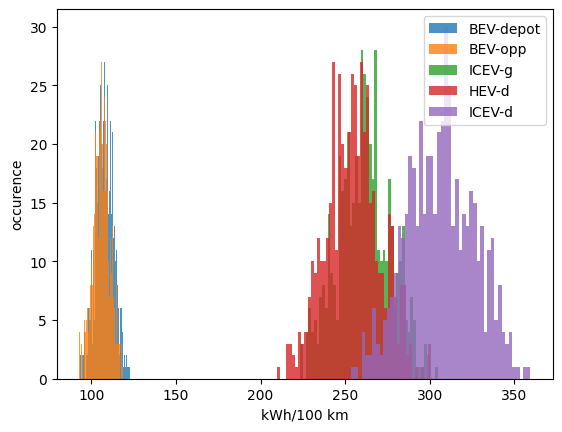

In [32]:
TtW_energy = bm.array.sel(size="13m-city", year=2020, parameter='TtW energy') * 1/3600 * 100

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.xlabel('kWh/100 km')
plt.ylabel('occurence')
plt.legend()

(5, 9, 500)


Text(0, 0.5, 'kg CO2-eq./vkm')

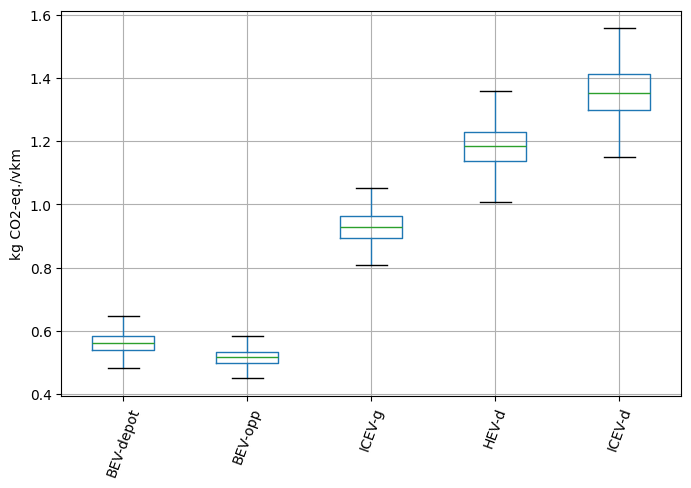

In [57]:
#ic = InventoryBus(bm)

#results = ic.calculate_impacts()
print(results.sel(impact_category='climate change', year=2020, size="13m-city").shape)
data_MC = results.sel(impact_category='climate change', year=2020, size="13m-city").sum(dim="impact").to_dataframe('climate change')
#data_MC
data_MC.unstack(level=[0])["climate change"].boxplot(showfliers=False, figsize=(8,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

In [55]:
data_MC.unstack(level=[0])

impact_category                                                  \
powertrain       BEV-depot         BEV-opp          ICEV-g           HEV-d   
value                                                                        
0           climate change  climate change  climate change  climate change   
1           climate change  climate change  climate change  climate change   
2           climate change  climate change  climate change  climate change   
3           climate change  climate change  climate change  climate change   
4           climate change  climate change  climate change  climate change   
...                    ...             ...             ...             ...   
495         climate change  climate change  climate change  climate change   
496         climate change  climate change  climate change  climate change   
497         climate change  climate change  climate change  climate change   
498         climate change  climate change  climate change  climate change   
499         climate change  climate change  climate change  climate change   

                                size                                          \
powertrain          ICEV-d BEV-depot   BEV-opp    ICEV-g     HEV-d    ICEV-d   
value                                                                          
0           climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
1           climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
2           climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
3           climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
4           climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
...                    ...       ...       ...       ...       ...       ...   
495         climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
496         climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
497         climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
498         climate change  13m-city  13m-city  13m-city  13m-city  13m-city   
499         climate change  13m-city  13m-city  13m-city  13m-city  13m-city   

                year                             climate change            \
powertrain BEV-depot BEV-opp ICEV-g HEV-d ICEV-d      BEV-depot   BEV-opp   
value                                                                       
0               2020    2020   2020  2020   2020       0.590733  0.530784   
1               2020    2020   2020  2020   2020       0.644324  0.526707   
2               2020    2020   2020  2020   2020       0.550068  0.503423   
3               2020    2020   2020  2020   2020       0.528040  0.455826   
4               2020    2020   2020  2020   2020       0.608353  0.544594   
...              ...     ...    ...   ...    ...            ...       ...   
495             2020    2020   2020  2020   2020       0.587678  0.535594   
496             2020    2020   2020  2020   2020       0.530969  0.505241   
497             2020    2020   2020  2020   2020       0.590440  0.537074   
498             2020    2020   2020  2020   2020       0.637866  0.571864   
499             2020    2020   2020  2020   2020       0.519313  0.496540   

                                          
powertrain    ICEV-g     HEV-d    ICEV-d  
value                                     
0           0.977913  1.256281  1.408306  
1           0.933099  1.248671  1.411841  
2           0.930058  1.160998  1.365610  
3           0.832517  1.060144  1.207426  
4           0.999982  1.257411  1.392419  
...              ...       ...       ...  
495         0.980776  1.243720  1.460227  
496         0.903766  1.174298  1.292920  
497         0.941380  1.176617  1.354255  
498         0.989545  1.291576  1.474287  
499         0.903704  1.165334  1.273754  

[500 rows x 20 columns]

Text(0, 0.5, 'kW')

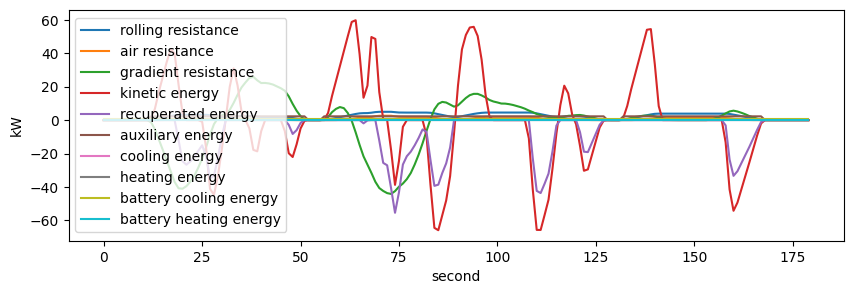

In [20]:
bm.energy.sel(powertrain="BEV-depot", size="9m", year=2020, second=range(180), value=0, parameter=[
    'rolling resistance',
    'air resistance',
    'gradient resistance',
    'kinetic energy',
    #'motive energy at wheels',
    #'motive energy',
    #'negative motive energy',
    'recuperated energy',
    'auxiliary energy',
    'cooling energy',
    'heating energy',
    'battery cooling energy',
    'battery heating energy',
    #'power load',
    #'transmission efficiency',
    #'engine efficiency',
    #'velocity'
]).to_dataframe("x").unstack()["x"].plot(figsize=(10, 3))
plt.legend(ncols=1, loc="center left")
plt.ylabel("kW")

In [6]:
inv = InventoryBus(bm, functional_unit="pkm", scenario="SSP2-NPi")

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
	 * between 2000 and 2014, % of non-hydro renew.: 3, hydro: 56, nuclear: 38.
	 * between 2010 and 2024, % of non-hydro renew.: 6, hydro: 61, nuclear: 29.
	 * between 2020 and 2034, % of non-hydro renew.: 16, hydro: 60, nuclear: 17.
	 * between 2030 and 2044, % of non-hydro renew.: 26, hydro: 58, nuclear: 6.
	 * between 2040 and 2054, % of non-hydro renew.: 30, hydro: 56, nuclear: 2.
	 * between 2050 and 2064, % of non-hydro renew.: 33, hydro: 54, nuclear: 1.
hydrogen - smr - natural gas is completed by hydrogen - electrolysis - PEM.
 	 * in 2000 _________________________________________ 0.0%
 	 * in 2010 _________________________________________ 0.0%
 	 * in 2020 _________________________________________ 1.0%
 	 * in 2030

In [7]:
res = inv.calculate_impacts()

Calculating impacts
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


In [15]:
df_full = res.sel(value=0, year=2020, impact_category=[
    'climate change',
    #'climate change w bio CO2',
    'acidification: terrestrial',
    #'ecotoxicity: freshwater',
    #'ecotoxicity: marine',
    #'ecotoxicity: terrestrial',
    #'energy resources: non-renewable, fossil',
    'eutrophication: freshwater',
    #'eutrophication: marine',
    #'human toxicity: carcinogenic',
    'human toxicity: non-carcinogenic',
    'ionising radiation potential (IRP)',
    #'agricultural land occupation (LOP)',
    'material resources: metals/minerals',
    #'ozone depletion',
    'particulate matter formation',
    'photochemical oxidant formation: human health',
    #'photochemical oxidant formation: terrestrial ecosystems',
    #'water consumption potential',
    #'Human noise impacts',
    #'non-renewable energy',
    #'renewable energy',
    'total energy'
]).to_dataframe("x").reset_index()

In [13]:
df_full.head()

,impact_category,size,powertrain,impact,year,value,x
0,climate change,13m-city,BEV-depot,glider,2020,0,0.008610
1,climate change,13m-city,BEV-depot,powertrain,2020,0,0.005465
2,climate change,13m-city,BEV-depot,energy storage,2020,0,0.009235
3,climate change,13m-city,BEV-depot,energy chain,2020,0,0.010110
4,climate change,13m-city,BEV-depot,maintenance,2020,0,0.001260


/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_35493/3308936738.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


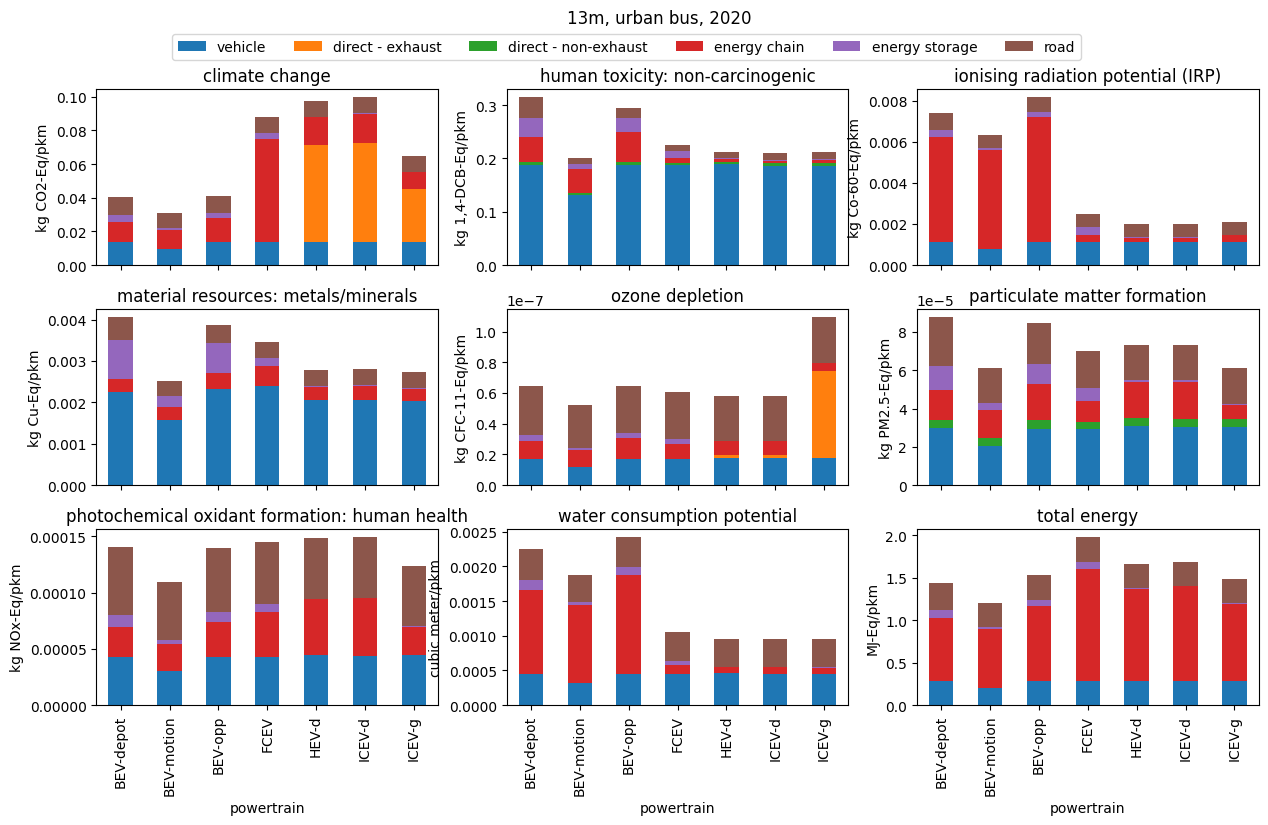

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 8), 
                        sharex=True,
                        nrows=3, ncols=3,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in df_full["impact_category"].unique()], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2030,
            size="13m-city",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    #df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct - exhaust", "direct - non-exhaust","energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/" + inv.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=6, bbox_to_anchor=(0.5, 3.85))    
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus, 2020")
plt.show()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_37790/504478991.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


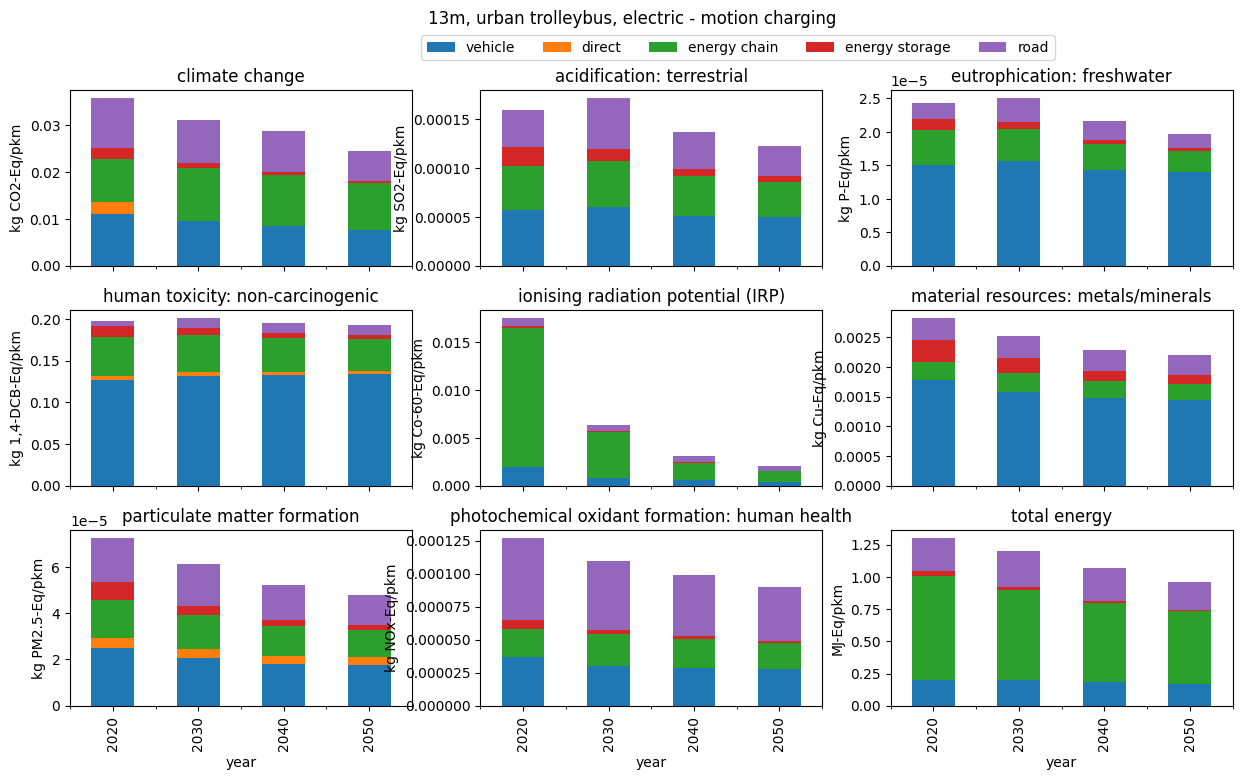

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 8), 
                        sharex=True,
                        nrows=3, ncols=3,
                        gridspec_kw=dict(hspace=0.25)
                       ) 


targets = zip([x for x in df_full["impact_category"].unique()], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            size="13m-city",
                 year=[2020, 2030, 2040, 2050],
                powertrain="BEV-motion",
            value=0).to_dataframe("val").unstack()["val"]
    
    df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
    df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
    
    df = df[["vehicle", "direct", "energy chain", "energy storage", "road"]]
    
    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/" + inv.func_unit)
    ax.legend().remove()
    
plt.legend(ncol=6, bbox_to_anchor=(0.5, 3.85))   
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban trolleybus, electric - motion charging")
plt.show()

In [19]:
from carculator_bus import *
import matplotlib.pyplot as plt
bip = BusInputParameters()
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"powertrain":["BEV-depot"], "size":["13m-city"], "year":[2020, 2030, 2040, 2050]}
)
bm = BusModel(array,)
bm.set_all()

list_res = []

for scenario in [
    "SSP2-NPi",
    "SSP2-PkBudg1150",
    "SSP2-PkBudg500"
]:
    inv = InventoryBus(bm, functional_unit="pkm", scenario=scenario)
    res = inv.calculate_impacts()
    res.sel(value=0, impact_category="climate change").to_dataframe("x").reset_index().to_excel(f"{scenario}.xlsx")
    

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+
|                 | 13m-city |
+-----------------+----------+
| BEV-depot, 2020 |   10.0   |
| BEV-depot, 2030 |   10.0   |
| BEV-depot, 2040 |   10.0   |
| BEV-depot, 2050 |   10.0   |
+-----------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
	 * between 2030 and 2043, % of non-hydro r

In [1]:
from carculator_bus import *
import matplotlib.pyplot as plt
bip = BusInputParameters()
bip.static()
dcts, array = fill_xarray_from_input_parameters(bip,sensitivity=True, 
                                                scope={"size":["13m-city"], "year":[2020], "powertrain":["ICEV-d"]})
bm = BusModel(array,)
bm.set_all()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+----------+
|              | 13m-city |
+--------------+----------+
| ICEV-d, 2020 |   10.0   |
+--------------+----------+


In [1]:
from carculator_bus import *
import matplotlib.pyplot as plt
bip = BusInputParameters()
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"powertrain":["BEV-depot"], "size":["13m-city"], "year":[2020, 2030, 2040, 2050]}
)
bm = BusModel(array,)
bm.set_all()

list_res = []

for scenario in [
    "SSP2-NPi",
    "SSP2-PkBudg1150",
    "SSP2-PkBudg500"
]:
    inv = InventoryBus(bm, functional_unit="pkm", scenario=scenario)
    res = inv.calculate_impacts()
    res.sel(value=0, impact_category="climate change").to_dataframe("x").reset_index().to_excel(f"{scenario}.xlsx")
    

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+
|                 | 13m-city |
+-----------------+----------+
| BEV-depot, 2020 |   10.0   |
| BEV-depot, 2030 |   10.0   |
| BEV-depot, 2040 |   10.0   |
| BEV-depot, 2050 |   10.0   |
+-----------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
	 * between 2030 and 2043, % of non-hydro r

In [2]:
inv = InventoryBus(bm, functional_unit="pkm", scenario="SSP2-NPi")

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
	 * between 2030 and 2043, % of non-hydro renew.: 26, hydro: 58, nuclear: 6.
	 * between 2040 and 2053, % of non-hydro renew.: 30, hydro: 56, nuclear: 2.
	 * between 2050 and 2063, % of non-hydro renew.: 33, hydro: 54, nuclear: 1.
*********************************************************************


In [3]:
res = inv.calculate_impacts(sensitivity=True)

Calculating impacts
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [3]:
from carculator_bus import *
import matplotlib.pyplot as plt
bip = BusInputParameters()
bip.static()
dcts, array = fill_xarray_from_input_parameters(
    bip,
    scope={"powertrain":["BEV-depot"], "size":["13m-city"], "year":[2000, 2010, 2020, 2030, 2040, 2050]}
)
bm = BusModel(array,)
bm.set_all()

inv = InventoryBus(bm, functional_unit="pkm")
res = inv.calculate_impacts()

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+
|                 | 13m-city |
+-----------------+----------+
| BEV-depot, 2000 |   10.0   |
| BEV-depot, 2010 |   10.0   |
| BEV-depot, 2020 |   10.0   |
| BEV-depot, 2030 |   10.0   |
| BEV-depot, 2040 |   10.0   |
| BEV-depot, 2050 |   10.0   |
+-----------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2000 and 2013, % of non-hydro renew.: 3, hydro:

In [5]:
inv.B.sel(category="climate change", year=2020).to_dataframe("x").to_excel("gwp2020.xlsx")

<Axes: xlabel='size,powertrain,year'>

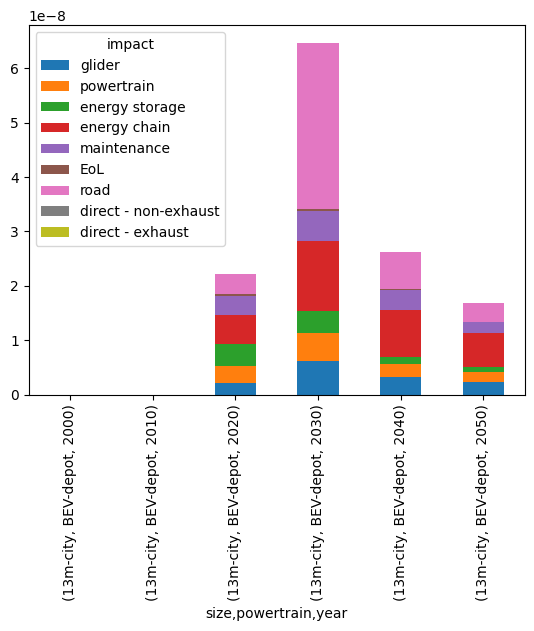

In [5]:
res.sel(value=0, impact_category="ozone depletion",).to_dataframe("x").unstack()["x"].plot(kind="bar", stacked=True)

In [4]:
[i for i in inv.inputs if "market for road" in i[0]]

[('market for road', 'GLO', 'meter-year', 'road'),
 ('market for road maintenance', 'RER', 'meter-year', 'road maintenance'),
 ('market for road wear emissions, passenger car',
  'GLO',
  'kilogram',
  'road wear emissions, passenger car')]

In [6]:
inv.B.sel(category="ozone depletion", activity=('market for road', 'GLO', 'meter-year', 'road'))

<xarray.DataArray (year: 6)>
array([4.47980909e-06, 4.47980909e-06, 4.47980909e-06, 4.71373807e-05,
       1.14078583e-05, 6.15356349e-06])
Coordinates:
  * year      (year) int64 2005 2010 2020 2030 2040 2050
    category  <U55 'ozone depletion'
    activity  object ('market for road', 'GLO', 'meter-year', 'road')

Text(0.5, 1.0, 'Parameters value increased by 10%')

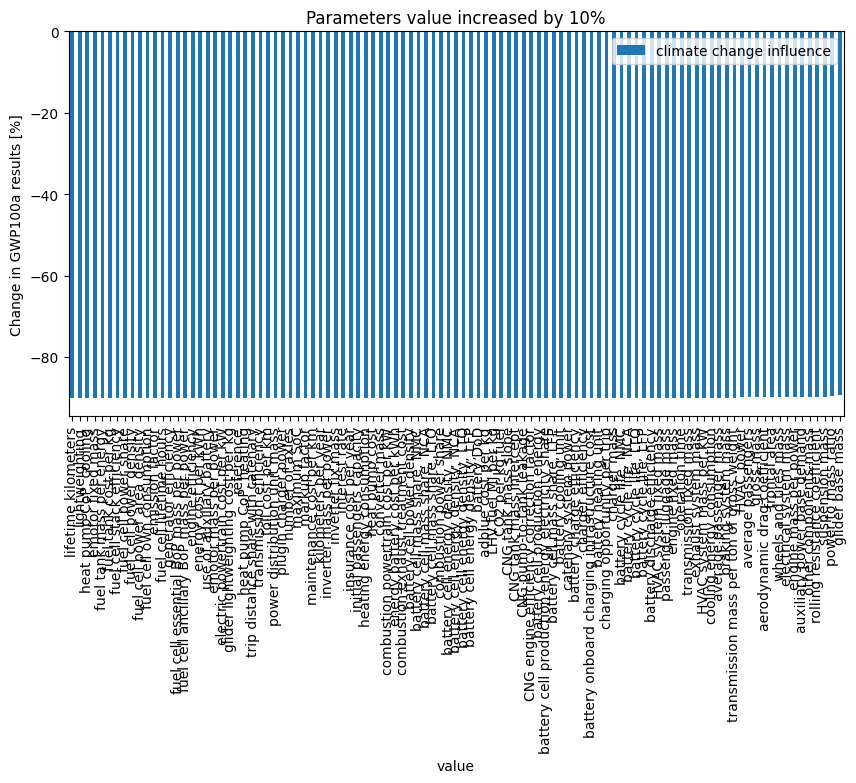

In [4]:
import matplotlib.pyplot as plt
df = res.sel(impact_category="climate change", powertrain="ICEV-d", size="13m-city", year=2020)\
    .to_dataframe("climate change influence")
df = df.loc[(df["climate change influence"] > 1.001)|(df["climate change influence"] < 1),:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y="climate change influence", kind="bar", figsize=(10,5))
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

In [11]:
res.sel(impact_category="climate change", powertrain="BEV-depot", size="13m-city", year=2020)\
    .to_dataframe("climate change influence")

,impact_category,size,powertrain,year,climate change influence
value,,,,,
reference,climate change,13m-city,BEV-depot,2020,0.100000
CNG engine efficiency correction factor,climate change,13m-city,BEV-depot,2020,0.100000
CNG pump-to-tank leakage,climate change,13m-city,BEV-depot,2020,0.100000
CNG tank mass intercept,climate change,13m-city,BEV-depot,2020,0.100000
CNG tank mass slope,climate change,13m-city,BEV-depot,2020,0.100000
...,...,...,...,...,...
transmission fixed mass,climate change,13m-city,BEV-depot,2020,0.100080
transmission mass per ton of gross weight,climate change,13m-city,BEV-depot,2020,0.100156
trip distance share with catenary,climate change,13m-city,BEV-depot,2020,0.100000


/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_34998/3103020190.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


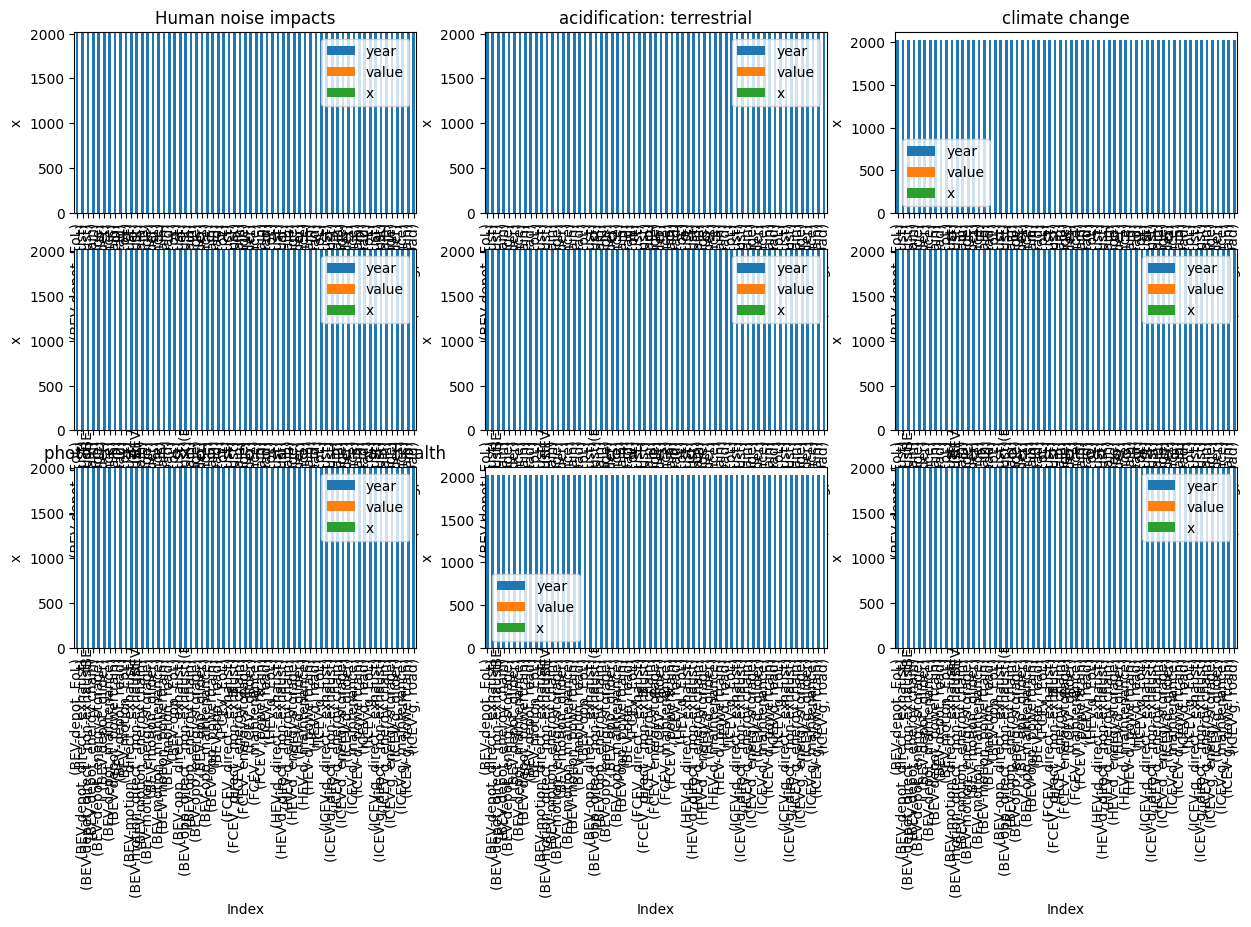

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'impact_category'
grouped = df.groupby('impact_category')

# Determine the number of subplots needed
n_categories = len(grouped)
rows = int(n_categories ** 0.5)
cols = int(n_categories / rows) + (n_categories % rows > 0)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array if it's 2D

# Iterate through each category and plot
for i, (category, data) in enumerate(grouped):
    ax = axes[i]
    data.groupby(["powertrain", "impact"]).sum().plot(kind="bar", stacked=True, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Index')  # Or your specific x-label
    ax.set_ylabel('x')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


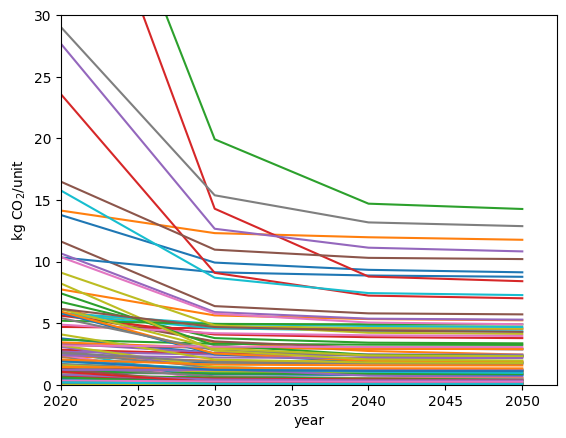

In [20]:
acts = [c for c in inv.B.coords["activity"].values if c[0].startswith("market for")][:100]
inv.B.sel(category="climate change", activity=acts).to_dataframe("x").unstack()["x"].plot(kind="line")
plt.ylim(0, 30)
plt.xlim(2020,)
plt.ylabel("kg CO$_2$/unit")
plt.legend().remove()

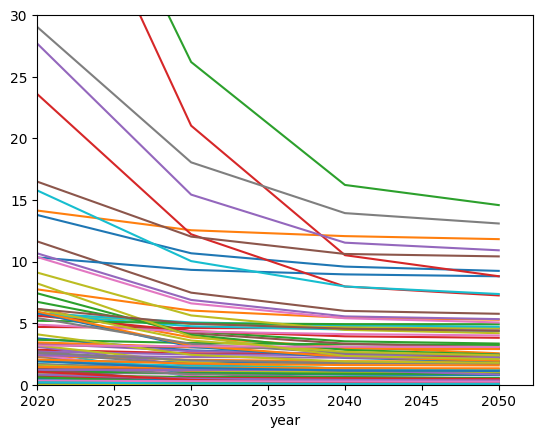

In [14]:
acts = [c for c in inv.B.coords["activity"].values if c[0].startswith("market for")][:100]
inv.B.sel(category="climate change", activity=acts).to_dataframe("x").unstack()["x"].plot(kind="line")
plt.ylim(0, 30)
plt.xlim(2020,)
plt.legend().remove()

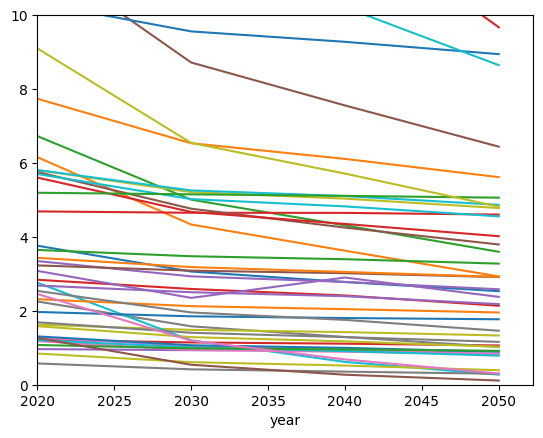

In [14]:
acts = [c for c in inv.B.coords["activity"].values if c[0].startswith("market for")][:50]
inv.B.sel(category="climate change", activity=acts).to_dataframe("x").unstack()["x"].plot(kind="line")
plt.ylim(0, 10)
plt.xlim(2020,)
plt.legend().remove()

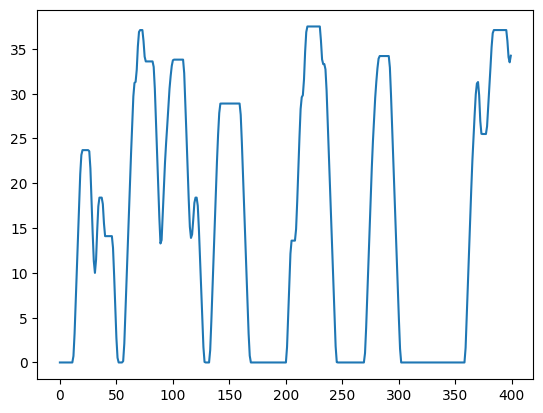

In [23]:
from carculator_utils.driving_cycles import get_standard_driving_cycle_and_gradient
import matplotlib.pyplot as plt
plt.plot(get_standard_driving_cycle_and_gradient("bus", ["13m-city"], "bus")[0][:400])

In [5]:
from carculator_bus import *
import matplotlib.pyplot as plt

fuels = [
    "diesel",
    "diesel - biodiesel - cooking oil",
    "diesel - biodiesel - algae",
    "diesel - biodiesel - rapeseed oil",
    "diesel - biodiesel - palm oil",
    "diesel - synthetic - FT - coal - energy allocation",
    "diesel - synthetic - FT - coal with CCS - energy allocation",
    "diesel - synthetic - FT - electrolysis - energy allocation",
    "diesel - synthetic - FT - wood - energy allocation",
    "diesel - synthetic - FT - wood with CCS - energy allocation",
    "diesel - synthetic - methanol - coal - energy allocation",
    "diesel - synthetic - methanol - coal with CCS - energy allocation",
    "diesel - synthetic - methanol - electrolysis - energy allocation",
    "diesel - synthetic - methanol - cement - energy allocation",
]

list_res=[]

year = 2020

for fuel in fuels:
    
    bip = BusInputParameters()
    #bip.stochastic(3)
    bip.static()
    dcts, array = fill_xarray_from_input_parameters(
        bip,
        scope={"year":[year,], "powertrain":["ICEV-d"], "size":["13m-city"]}
    )
    bm = BusModel(array, fuel_blend={"diesel": {"primary": {"type": fuel, "share": [1,]}}})
    bm.set_all()
    inv = InventoryBus(bm, functional_unit="pkm")
    res = inv.calculate_impacts()
    list_res.append(res.sel(impact_category="climate change w bio CO2", value=0, year=year, size="13m-city").values[0])

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+----------+
|              | 13m-city |
+--------------+----------+
| ICEV-d, 2020 |   10.0   |
+--------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['LTO', 'NMC-622'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
diesel is completed by diesel - biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 0%
 * *********************************

KeyError: 'One of the primary or secondary fuels specified in the fuel blend for diesel is not valid.'

In [83]:
from carculator_bus import *
import matplotlib.pyplot as plt

fuels = [
    "methane",
    "methane - biomethane - sewage sludge",
    "methane - synthetic - coal",
    "methane - synthetic - electrochemical",
    "methane - synthetic - electrochemical - cement",
    "methane - synthetic - electrochemical - MSWI",
    "methane - synthetic - biological",
    "methane - synthetic - biological - cement",
    "methane - synthetic - biological - MSWI",
]

for fuel in fuels:
    
    bip = BusInputParameters()
    #bip.stochastic(3)
    bip.static()
    dcts, array = fill_xarray_from_input_parameters(
        bip,
        scope={"year":[year,], "powertrain":["ICEV-g"], "size":["13m-city"]}
    )
    bm = BusModel(array, fuel_blend={"methane": {"primary": {"type": fuel, "share": [1,]}}})
    bm.set_all()
    inv = InventoryBus(bm, functional_unit="pkm")
    res = inv.calculate_impacts()
    list_res.append(res.sel(impact_category="climate change w bio CO2", value=0, year=year, size="13m-city").values[0])

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+--------------+----------+
|              | 13m-city |
+--------------+----------+
| ICEV-g, 2020 |   10.0   |
+--------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
methane is completed by methane - biomethane - sewage sludge.
 	 * in 2020 _________________________________________ 0%
 * ****************************

In [84]:
from carculator_bus import *
import matplotlib.pyplot as plt

fuels = [
    "hydrogen - electrolysis - PEM",
    "hydrogen - electrolysis - SOEC",
    "hydrogen - electrolysis - AEC",
    "hydrogen - pyrolysis",
    "hydrogen - thermochemical water splitting",
    "hydrogen - smr - natural gas",
    "hydrogen - smr - natural gas with CCS",
    "hydrogen - smr - biogas",
    "hydrogen - smr - biogas with CCS",
    "hydrogen - coal gasification",
    "hydrogen - coal gasification with CCS",
    "hydrogen - wood gasification",
    "hydrogen - wood gasification with CCS",
    "hydrogen - atr - natural gas",
    "hydrogen - atr - natural gas with CCS",
    "hydrogen - atr - biogas",
    "hydrogen - atr - biogas with CCS",
]

for fuel in fuels:
    
    bip = BusInputParameters()
    #bip.stochastic(3)
    bip.static()
    dcts, array = fill_xarray_from_input_parameters(
        bip,
        scope={"year":[year,], "powertrain":["FCEV"], "size":["13m-city"]}
    )
    bm = BusModel(array, fuel_blend={"hydrogen": {"primary": {"type": fuel, "share": [1,]}}})
    bm.set_all()
    inv = InventoryBus(bm, functional_unit="pkm")
    res = inv.calculate_impacts()
    list_res.append(res.sel(impact_category="climate change w bio CO2", value=0, year=year, size="13m-city").values[0])

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+------------+----------+
|            | 13m-city |
+------------+----------+
| FCEV, 2020 |   10.0   |
+------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 15, hydro: 60, nuclear: 17.
hydrogen - electrolysis - PEM is completed by hydrogen - electrolysis - SOEC.
 	 * in 2020 _________________________________________ 0%
 * **********************

In [85]:
from carculator_bus import *
import matplotlib.pyplot as plt

fuels = [
    "Hydro",
    "Nuclear",
    "Gas",
    "Solar",
    "Wind",
    "Biomass",
]

for f, fuel in enumerate(fuels):
    
    bip = BusInputParameters()
    #bip.stochastic(3)
    bip.static()
    dcts, array = fill_xarray_from_input_parameters(
        bip,
        scope={"year":[year,], "powertrain":["BEV-depot"], "size":["13m-city"]}
    )
    bm = BusModel(array)
    bm.set_all()
    bc = {
        "custom electricity mix": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    }
    bc["custom electricity mix"][0][f]=1
    inv = InventoryBus(bm, functional_unit="pkm", background_configuration=bc)
    res = inv.calculate_impacts()
    list_res.append(res.sel(impact_category="climate change w bio CO2", value=0, year=year, size="13m-city").values[0])

Finding solutions for buses...

Number of passengers on board
'X' BEV with driving mass when fully occupied superior to the permissible gross weight.
'*' buses that do not comply wih energy reduction target.
'/' vehicles not available for the specified year or charging strategy.
'O' electric vehicles that do not have enough time to charge batteries overnight.
+-----------------+----------+
|                 | 13m-city |
+-----------------+----------+
| BEV-depot, 2020 |   10.0   |
+-----------------+----------+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The functional unit is: pkm.
 * The background prospective scenario is: SSP2-NPi.
 * The country of use is: CH.
 * Power and energy batteries produced in CN using ['NMC-622', 'LTO'] chemistry/ies
	 * between 2020 and 2033, % of non-hydro renew.: 0, hydro: 100, nuclear: 0.
*********************************************************************
Calculating impacts
0% [##############################] 100% | ETA:

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

labels = [
    "diesel",
    "biodiesel - cooking oil",
    "biodiesel - algae",
    "biodiesel - rapeseed oil",
    "biodiesel - palm oil",
    "FT - coal",
    "FT - coal with CCS",
    "FT - electrolysis",
    "FT - wood",
    "FT - wood with CCS",
    "methanol - coal ",
    "methanol - coal with CCS",
    "methanol - electrolysis",
    "methanol - (CO2 from cement)",
    "cng",
    "biomethane - sewage sludge",
    "synthetic - coal",
    "electrochemical",
    "electrochemical - cement",
    "electrochemical - MSWI",
    "biological",
    "biological - cement",
    "biological - MSWI",
    "electrolysis - PEM",
    "electrolysis - SOEC",
    "electrolysis - AEC",
    "pyrolysis",
    "therm. water splitting",
    "smr - natural gas",
    "smr - natural gas with CCS",
    "smr - biogas",
    "smr - biogas with CCS",
    "atr - natural gas",
    "atr - natural gas with CCS",
    "atr - biogas",
    "atr - biogas with CCS",
    "coal gas.",
    "coal gas. with CCS",
    "wood gas.",
    "wood gas. with CCS",
    "Hydro",
    "Nuclear",
    "Gas",
    "Solar",
    "Wind",
    "Biomass",
]


df=pd.DataFrame(list_res, columns=res.coords["impact"].values)
df["fuel"]=labels
df["vehicle"] = df[["powertrain", "glider", "EoL", "maintenance"]].sum(axis=1)
df["direct"] = df[["direct - exhaust", "direct - non-exhaust"]].sum(axis=1)
df=df[["fuel", "energy storage", "energy chain", "road", "vehicle", "direct"]]

Text(42.5, 0.35, 'Battery')

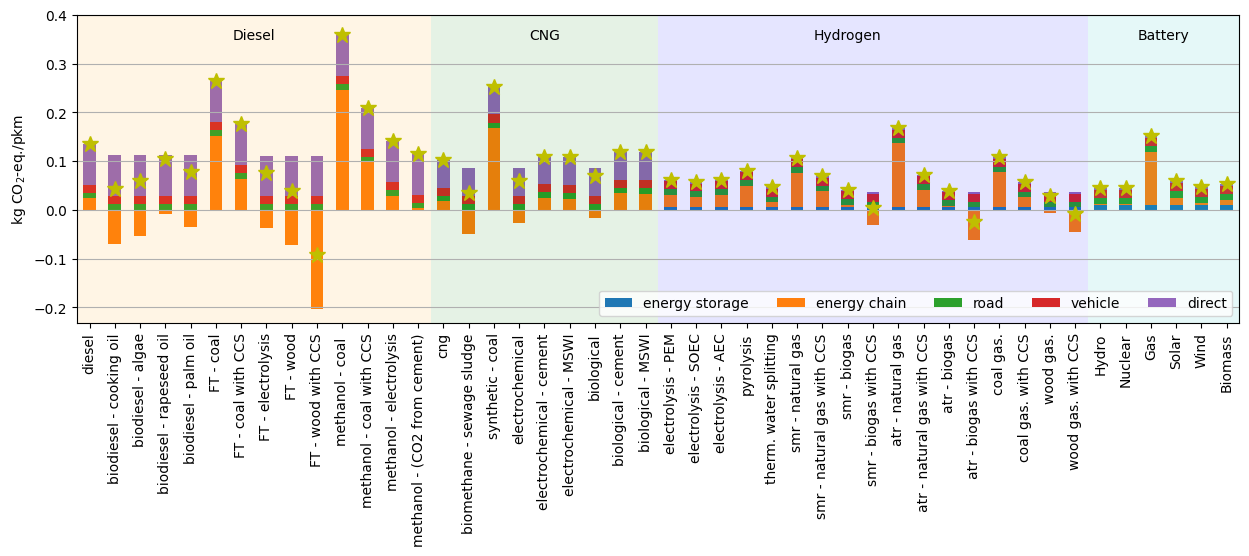

In [87]:
df.plot(kind="bar", stacked=True, figsize=(15,4))
df.loc[:,"energy storage":].sum(1).plot(kind="line", marker="*", linewidth=0, color="y", markersize=12)
plt.xticks(ticks=range(len(labels)),labels=labels, rotation=90)
plt.grid(axis="y")
plt.ylim(None, .4)
plt.ylabel("kg CO$_2$-eq./pkm")
plt.legend(ncol=5, loc="lower right")


plt.axvspan(-.5, 13.5, color='orange', alpha=0.1, lw=0)
plt.axvspan(13.5, 22.5, color='g', alpha=0.1, lw=0)
plt.axvspan(22.5, 39.5, color='b', alpha=0.1, lw=0)
plt.axvspan(39.5, 45.5, color='c', alpha=0.1, lw=0)

plt.annotate("Diesel", [(6.5), .35], annotation_clip=False, fontsize=10, ha="center")
plt.annotate("CNG", [(18), .35], annotation_clip=False, fontsize=10, ha="center")
plt.annotate("Hydrogen", [(30), .35], annotation_clip=False, fontsize=10, ha="center")
plt.annotate("Battery", [(42.5), .35], annotation_clip=False, fontsize=10, ha="center")

In [94]:
[p for p in bm.array.coords["parameter"].values if "passenger" in p]

['actual passengers capacity',
 'average passenger mass',
 'average passengers',
 'initial passengers capacity',
 'passenger luggage mass']

In [96]:
bm.array.sel(powertrain="BEV-depot", size="13m-city", year=2020, value=0, parameter="initial passengers capacity")

<xarray.DataArray ()>
array(64., dtype=float32)
Coordinates:
    size        <U8 '13m-city'
    powertrain  <U9 'BEV-depot'
    parameter   <U64 'initial passengers capacity'
    year        int64 2020
    value       int64 0

In [72]:
inv.B.sel(year=2020, activity=('Carbon dioxide, in air', ('natural resource', 'in air'), 'kilogram'))

<xarray.DataArray (category: 23)>
array([ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
Coordinates:
    year      int64 2020
  * category  (category) <U55 'climate change' ... 'total energy'
    activity  object ('Carbon dioxide, in air', ('natural resource', 'in air'...

In [4]:
res = inv.calculate_impacts()

Calculating impacts
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


In [7]:
res.sel(impact_category="climate change", value=0, year=2020, size="13m-city").to_dataframe("x").unstack()["x"]

impact,glider,powertrain,energy storage,energy chain,maintenance,EoL,road,direct - non-exhaust,direct - exhaust
powertrain,,,,,,,,,
BEV-depot,0.007172,0.005137,0.007549,0.008651,0.001063,0.000694,0.011283,0.002952,0.000000
BEV-motion,0.005102,0.003659,0.002266,0.008028,0.000758,0.000281,0.009071,0.002103,0.000000
BEV-opp,0.007169,0.005150,0.005781,0.009583,0.001063,0.000581,0.010076,0.002952,0.000000
FCEV,0.007166,0.005155,0.003983,0.058945,0.001063,0.000245,0.009434,0.002952,0.000000
HEV-d,0.007142,0.005741,0.000321,0.017250,0.001063,0.000179,0.009205,0.002952,0.056454
ICEV-d,0.007143,0.005745,0.000125,0.020059,0.001063,0.000167,0.009268,0.002952,0.065645
ICEV-g,0.007143,0.005662,0.000130,0.012143,0.001063,0.000167,0.009278,0.002952,0.033972


In [4]:
inv.export_lci(format="file")

Extracted 1 worksheets in 0.74 seconds


0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2614
Total time elapsed: 00:00:00
0% [##############################] 100% | ETA: 00:00:00 | Item ID: 2614
Total time elapsed: 00:00:00


'/Users/romain/GitHub/carculator_bus/dev/carculator_lci_2030_bw2.xlsx'

In [7]:
bm.energy_storage

{'electric': {('BEV-depot', '13m-city', 2020): 'NMC-622',
  ('BEV-depot', '13m-city', 2030): 'NMC-622',
  ('BEV-depot', '13m-city-double', 2020): 'NMC-622',
  ('BEV-depot', '13m-city-double', 2030): 'NMC-622',
  ('BEV-depot', '13m-coach', 2020): 'NMC-622',
  ('BEV-depot', '13m-coach', 2030): 'NMC-622',
  ('BEV-depot', '13m-coach-double', 2020): 'NMC-622',
  ('BEV-depot', '13m-coach-double', 2030): 'NMC-622',
  ('BEV-depot', '18m', 2020): 'NMC-622',
  ('BEV-depot', '18m', 2030): 'NMC-622',
  ('BEV-depot', '9m', 2020): 'NMC-622',
  ('BEV-depot', '9m', 2030): 'NMC-622',
  ('FCEV', '13m-city', 2020): 'NMC-622',
  ('FCEV', '13m-city', 2030): 'NMC-622',
  ('FCEV', '13m-city-double', 2020): 'NMC-622',
  ('FCEV', '13m-city-double', 2030): 'NMC-622',
  ('FCEV', '13m-coach', 2020): 'NMC-622',
  ('FCEV', '13m-coach', 2030): 'NMC-622',
  ('FCEV', '13m-coach-double', 2020): 'NMC-622',
  ('FCEV', '13m-coach-double', 2030): 'NMC-622',
  ('FCEV', '18m', 2020): 'NMC-622',
  ('FCEV', '18m', 2030): 'NMC-

In [9]:
bm.array.sel(powertrain="ICEV-d", year=2030, parameter="battery lifetime replacements")

<xarray.DataArray (size: 6, value: 1)>
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)
Coordinates:
  * size        (size) <U16 '13m-city' '13m-city-double' ... '18m' '9m'
    powertrain  <U10 'ICEV-d'
    parameter   <U64 'battery lifetime replacements'
    year        int64 2030
  * value       (value) int64 0

In [3]:
bm.array.sel(powertrain="BEV-motion", year=2030, parameter="electric energy stored")

<xarray.DataArray (size: 6, value: 1)>
array([[ 12.668128],
       [ 10.      ],
       [556.55396 ],
       [619.88446 ],
       [ 10.      ],
       [ 10.      ]], dtype=float32)
Coordinates:
  * size        (size) <U16 '13m-city' '13m-city-double' ... '18m' '9m'
    powertrain  <U10 'BEV-motion'
    parameter   <U64 'electric energy stored'
    year        int64 2030
  * value       (value) int64 0

In [3]:
bm.array.sel(powertrain="BEV-motion", year=2030, parameter="TtW energy")

<xarray.DataArray (size: 6, value: 1)>
array([[3229.563 ],
       [   0.    ],
       [   0.    ],
       [   0.    ],
       [3992.829 ],
       [2009.5457]], dtype=float32)
Coordinates:
  * size        (size) <U16 '13m-city' '13m-city-double' ... '18m' '9m'
    powertrain  <U10 'BEV-motion'
    parameter   <U64 'TtW energy'
    year        int64 2030
  * value       (value) int64 0